In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('stats_tourisme.csv')
df.head()
sns.set_style('darkgrid')

Idées : 

Le nombre de passagers aériens : disponilibité de voyage aérien

Possibilité de venir dans un pays pour découvrir une ville et au passage en faire d'autrs (cf nombre de voyage des habitants dans un autre endroit du pays par an)


Axes d'approfondissement :


Voir tout ce qui est fame autour des pays, les tendances de voyage, la communication, les pubs...

### Un pays adapté au tourisme ?

S'il semble évident de dire que le la popularité de certains monuments peut pousser les touristes à venir dans un pays ou même de dire que Venise est célèbre pour la Saint Valentin, il en est difficile de matérialiser ces aspects culturels/d'opinions dans un tableur. 

On va donc chercher trouver d'autres raisons, et notamment en essayant de s'intéresser aux services proposés par le pays en question.

* Dans un premier temps on peut essayer de comparer les touristes au PIB par habitant, indicateur de la richesse et de la qualité de vie d'un pays

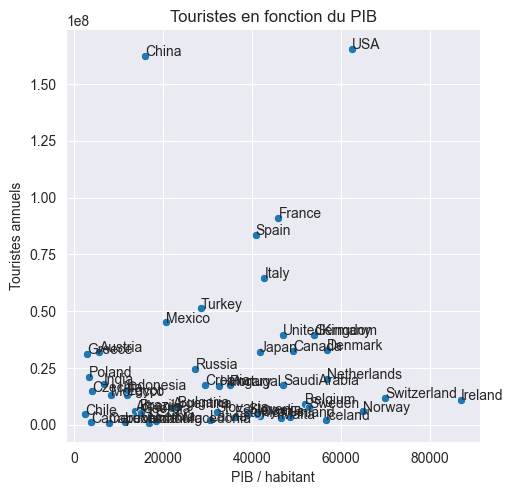

In [4]:
masque = (df['Touristes annuels'].notna()) & (df['PIB / habitant'].notna())
touristes_par_PIB = df.loc[masque, ['Pays', 'Touristes annuels', 'PIB / habitant']]

graphique1 = sns.relplot(data=touristes_par_PIB, x='PIB / habitant', y='Touristes annuels')
graphique1.set(title = "Touristes en fonction du PIB");

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
label_point(touristes_par_PIB['PIB / habitant'],touristes_par_PIB['Touristes annuels'], touristes_par_PIB['Pays'], plt.gca())


De ce qu'on peut voir, il ne semble pas y avoir de corrélation importante entre PIB du pays par hab et voyageurs, sûrement car les gens voyagent pour le paysage et la culture plutôt que la richesse du pays en question (peut-être aussi un facteur d'accessibilité au contraire : un pays cher n'est pas accesssible à tous).

Cependant si on exclue les points qui restent environ constants, on voit qu'au dessus de 0.25e8 touristes on a des valeurs qui avaient tendance à augmenter. Ici encore une fois on observe que la France possède un certain succès malgré un PIB/hab moyen parmi les autres habitants, en effet : 

In [5]:
pib = df.loc[df['PIB / habitant'].notna(), ['Pays', 'PIB / habitant']]
pib = pib.set_index('Pays')
print('PIB/hab en France :', pib.loc['France']['PIB / habitant'])
print('PIB/hab en moyenne :', int(np.round(pib.mean().iloc[0], 0)), '+-', int(np.round(pib.std().iloc[0], 0)));

PIB/hab en France : 45923
PIB/hab en moyenne : 30407 +- 20229


Comme on peut le voir la France se situe dans l'écart-type au premier ordre, donc dans la tranche de 68% des pays, mais pour autant elle est le 3ème pays le plus touristique. 

Voyons voir les autres paramètres qui pourraient influencer ce résultat.

* Dans un second temps on peut essayer de comparer les touristes aux hôtels, essentiels à la présence touristique

On commence par voir une veu d'ensemble de la répartition des touristes pas nombre d'hôtel selon leur type

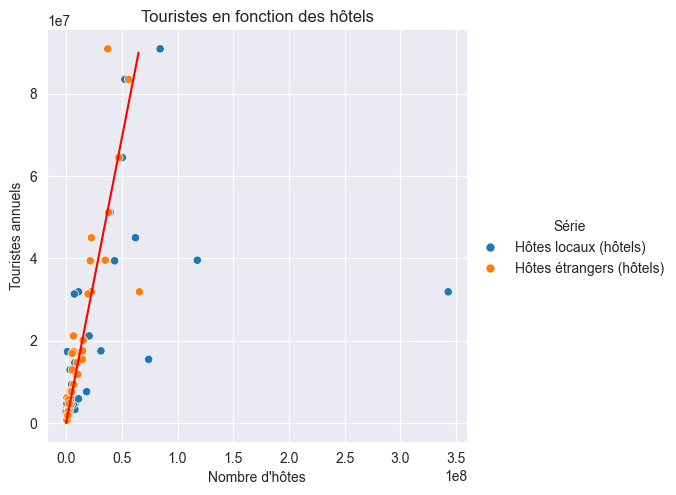

In [7]:
masque = (df['Hôtes locaux (hôtels)'].notna()) & (df['Hôtes étrangers (hôtels)'].notna())
touristes_par_hotel = df.loc[masque, ['Pays', 'Touristes annuels', 'Hôtes locaux (hôtels)', 'Hôtes étrangers (hôtels)']]


#On veut représenter dans le même graphe mais avec couleurs différentes
df_hotel = pd.melt(touristes_par_hotel, id_vars=['Touristes annuels'], value_vars=['Hôtes locaux (hôtels)', 'Hôtes étrangers (hôtels)'], 
                    var_name='Série', value_name='Valeur')

graphique2 = sns.relplot(data=df_hotel, x='Valeur', y='Touristes annuels', hue='Série')
graphique2.set( xlabel = "Nombre d'hôtes", title = "Touristes en fonction des hôtels");
#sinon le Japon empêche de bien visualiser le reste
#mais il vaut 3.5e8 hotels pour 2.5e7 touristes

#Regression
plt.plot([0,0.65e8], [0, 9e7], 'r');

Comme on peut le voir on a bien une relation presque linéaire entre les deux, ce qui parait cohérent car plus on a de touristes plus il faut les loger. Cela semble être une relation covariante car plus il y a de touristes plus il y a d'hôtels mais aussi plus il y a d'hôtels plus on attire de touristes car le choix est possible, les prix et la qualité joueront sur la décision de touristes à venir ou non. Des hôtels hors de prix en petit nombre ne permettront qu'à des minorités de venir tandis qu'un large panel de gamme de prix/qualité conviendra à plus grand nombre.

Comme dans notre série de donnée on a les hôtes étrangers et locaux on va prendre la somme des deux, ce qui donnera un ordre d'idée des hôtels disponibles par pays

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


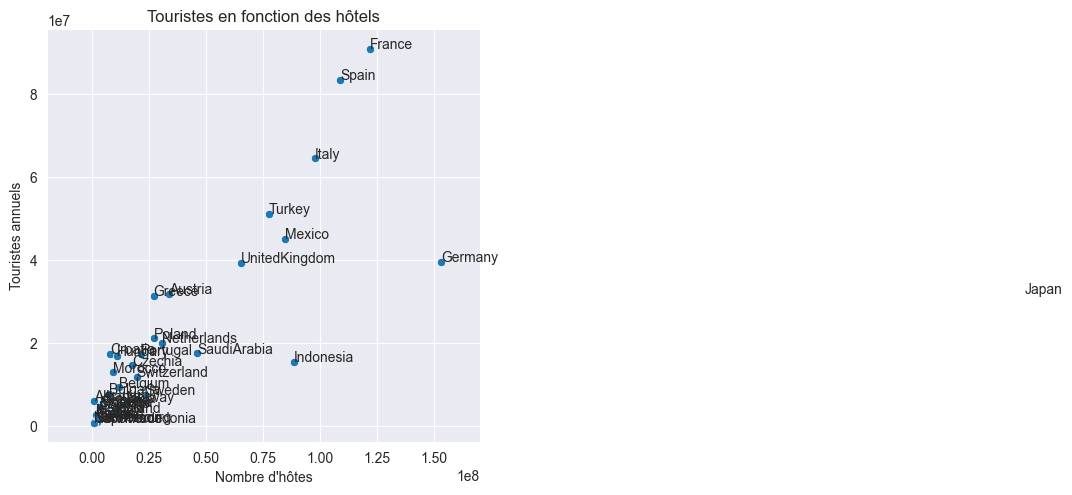

In [8]:
touriste_par_hotel_total = touristes_par_hotel #on va rajouter une colonne
touriste_par_hotel_total["Nombre total d'hôtes"] = touriste_par_hotel_total['Hôtes locaux (hôtels)'] + touriste_par_hotel_total['Hôtes étrangers (hôtels)']

graphique3 = sns.relplot(data=touriste_par_hotel_total, x="Nombre total d'hôtes", y='Touristes annuels')
graphique3.set( xlabel = "Nombre d'hôtes", title = "Touristes en fonction des hôtels")

label_point(touriste_par_hotel_total["Nombre total d'hôtes"],touriste_par_hotel_total['Touristes annuels'], touriste_par_hotel_total['Pays'], plt.gca())
plt.xlim(xmax = 1.7e8);

Encore une fois on peut voir que la France est en tête, avec un nombre important de disponibilité d'hôtel, ce qui était prévisible au départ.

Mais au-delà des hôtels, on peut également s'intéresser aux services proposés par le pays.

* Dans un troisième temps on peut essayer de comparer les touristes aux nombres d'employés

[Text(0.5, 0, 'Nb employés'), Text(0.5, 1.0, 'Emploi dans la restauration')]

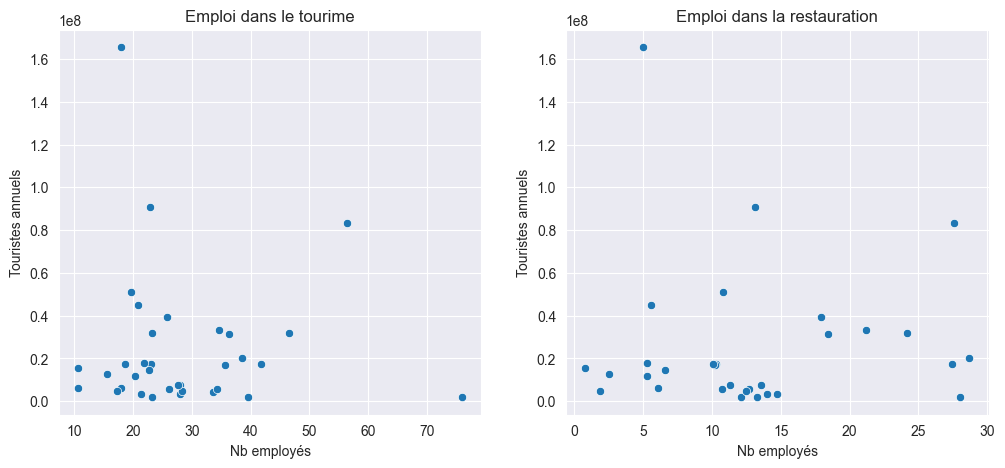

In [30]:
masque1 = df["Nombre d'employés dans le tourisme pour 1000 habitants"].notna()
masque2 = df["Nombre d'employés dans la restauration pour 1000 habitants"].notna()
touristes_par_tourisme = df.loc[masque1, ['Pays', 'Touristes annuels', "Nombre d'employés dans le tourisme pour 1000 habitants"]]
touristes_par_restauration = df.loc[masque2, ['Pays', 'Touristes annuels', "Nombre d'employés dans la restauration pour 1000 habitants"]]

fig, axes = plt.subplots(1, 2, figsize = (12,5))

graphique4 = sns.scatterplot(data=touristes_par_tourisme, x="Nombre d'employés dans le tourisme pour 1000 habitants", y='Touristes annuels', ax = axes[0])
graphique4.set(xlabel = 'Nb employés', title = "Emploi dans le tourime")

graphique5 = sns.scatterplot(data=touristes_par_restauration, x="Nombre d'employés dans la restauration pour 1000 habitants", y='Touristes annuels', ax = axes[1])
graphique5.set(xlabel = 'Nb employés', title = "Emploi dans la restauration")


De ce qu'on peut voir, il n'y a pas de causalité apparente entre les deux, la distribution reste assez aléatoire même si on s'attendait plutôt au contraire car plus il y a de restaurants plus la culture du pays peut être mise en avant et donc attirer du monde. Regardons ceux de la France:

In [33]:
touri = df.loc[df["Nombre d'employés dans le tourisme pour 1000 habitants"].notna(), ['Pays', "Nombre d'employés dans le tourisme pour 1000 habitants"]]
touri = touri.set_index('Pays')
restau = df.loc[df["Nombre d'employés dans la restauration pour 1000 habitants"].notna(), ['Pays', "Nombre d'employés dans la restauration pour 1000 habitants"]]
restau = restau.set_index('Pays')
print('Employés tourisme /1000 touristes en France :', touri.loc['France']["Nombre d'employés dans le tourisme pour 1000 habitants"])
print('Employés restauration /1000 touristes en France :', restau.loc['France']["Nombre d'employés dans la restauration pour 1000 habitants"])

Employés tourisme /1000 touristes en France : 22.8
Employés restauration /1000 touristes en France : 13.1


Ces valeurs restent assez moyennes comparées aux autres pays, pour autant la France est considérée comme un des meilleurs pays gastronomiques (si ce n'est le meilleur) et possède un tourisme très important.

*Deux explications possibles* : 

* Le tourisme est seulement dû à l'attractivité de ses monuments et non à celui de ses services touristiques, ie. les gens viennent visiter par eux-mêmes, même si les employés ne sont pas extrêmement en grand nombre. Ou bien la qualité du service est bien meilleure sans pour autant avoir énormément  d'employés, mais il faudrait pour cela récupérer des données de sondage de satisfaction des visiteurs, ce qu'on n'a pas ici

* Même raisonnement pour les restaurants :

   1. En terme de nombre de restaurants : ce nombre d'employés ne reflète pas forcément le nombre de restaurants, car on peut faire tourner très correctement un restaurant avec moins d'employés si ceux-ci sont de qualité, ce qui ne permet en effet pas de mesurer correctement le nombre de restaurants français (pas explicitement proportionnels au nombre d'employés, car peu d'employés peuvent tenir une grande enceinte) ce qui explique le faible nombre d'employé en comparaison des touristes.
   2. En terme de qualité gastronomique : de même le nombre d'employé ne reflète pas non plus la qualité gastronomique du restaurant (qui dépend des qualités des cuisiniers...)